<a href="https://colab.research.google.com/github/fongwc/value_for_you/blob/main/BankScam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

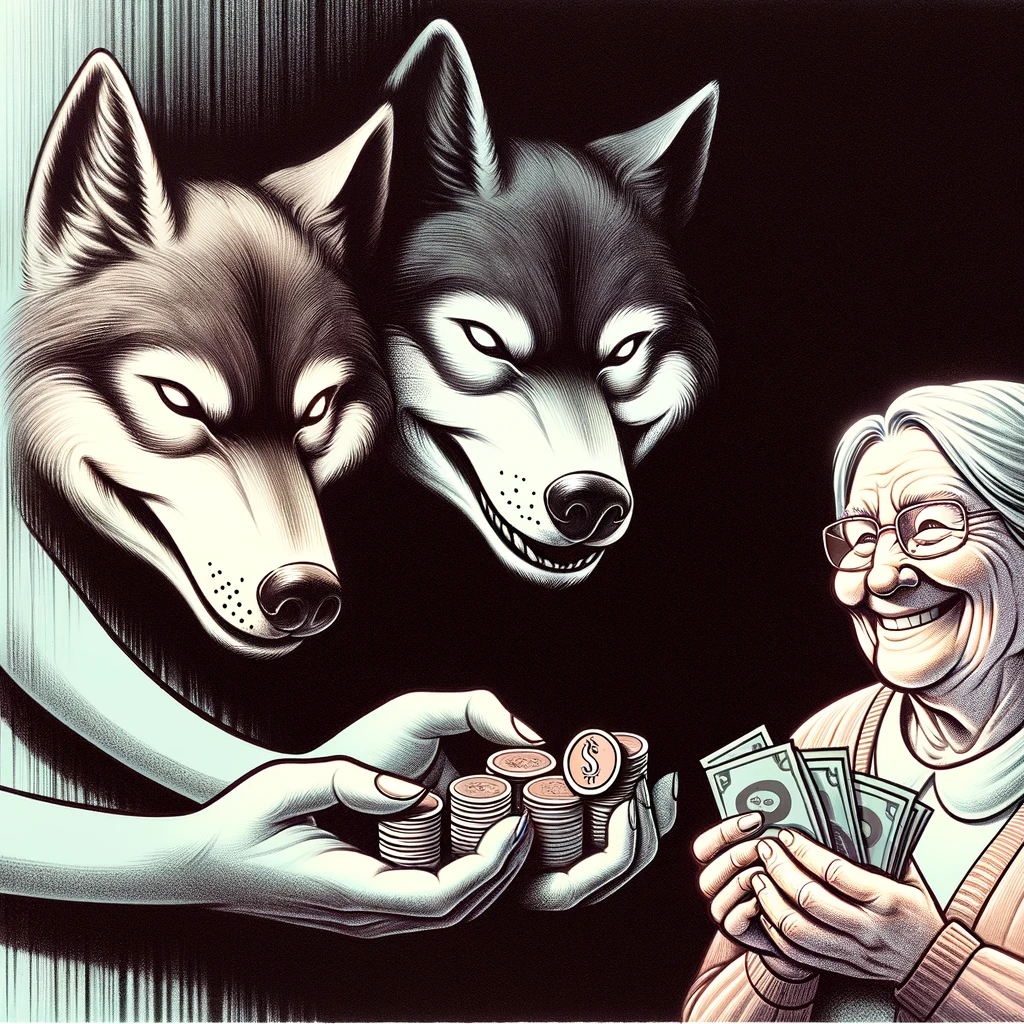

### Problem Statement: From the news reports, it appears that the modus operandi of bank scams perpetuated by bad actors is that they will change the exisitng email adress and/or telepone of the victims without their knowledge.  That's why during interviews with the press, the common question asked was "since I have set 2FA, why wasn't I informed?  How could they just take the monies from bank accounts like that?"

### Thinking simplistically, wouldn't a change of email address and telephone number an anomaly?  How are the chances that one has to update the email address and/or phone number?  Chances are pretty remote I would think.  In such cases, could something more be done like manual calls to verify the change, especially if it involves changes to telephone number since a mobile phone has become an integral part of our life.

### Below is a simplified program when a Bank received request from customer to change his/her email address and/or telephone number.  This is for simulaton only and of course, in the real banking world, it will take more to ensure a robust detection and verification processes.

In [1]:
# Simulated database of customer details
customers = [
    {"email": "customer1@hotmail.com", "phone": "12345678"},
    {"email": "customer2@gmail.com", "phone": "87654321"},
    # Of course, there are many more customers' records in the database
]

def send_verification_message(phone_number, message):
    print(f"Sending verification to {phone_number}: {message}")

def send_email(email, message):
    print(f"Sending email to {email}: {message}")

def is_valid_phone(phone_number):
    return phone_number.isdigit() and len(phone_number) == 8

def is_customer(email, phone):
    return any(cust for cust in customers if cust["email"] == email and cust["phone"] == phone)

def get_customer_input():
    existing_email = input("Enter your existing email: ")
    existing_phone = input("Enter your existing phone number (8 digits): ")
    if not is_valid_phone(existing_phone) or not is_customer(existing_email, existing_phone):
        print("Error: Invalid phone number or your email and phone number do not match our records.")
        return None, None
    return existing_email, existing_phone

def update_email_only():
    existing_email, existing_phone = get_customer_input()
    if existing_email:
        new_email = input("Enter your new email: ")
        print("Request to change email received.")
        send_verification_message(existing_phone, "Please confirm your email change.")
        # In a real system, you would wait for user confirmation here
        print("Email change confirmed.")
        send_email(new_email, "Email updated")
        send_verification_message(existing_phone, "Email updated")

def update_phone_only():
    existing_email, existing_phone = get_customer_input()
    if existing_email:
        new_phone = input("Enter your new phone number (8 digits): ")
        if not is_valid_phone(new_phone):
            print("Error: Invalid new phone number.")
            return
        print("Request to change phone number received.")
        # Notify bank staff for verification
        print("Bank staff notified to call for verification. [not visible to Customer]")
        print("New telephone number is pending update")

def update_email_and_phone():
    existing_email, existing_phone = get_customer_input()
    if existing_email:
        new_email = input("Enter your new email: ")
        new_phone = input("Enter your new phone number (8 digits): ")
        if not is_valid_phone(new_phone):
            print("Error: Invalid new phone number.")
            return
        print("Request to change both email and phone number received.")
        # Notify bank staff to call new phone for verification
        print("Bank staff notified to call new phone number for verification. [not visible to Customer]")
        print("Email and telephone number are pending update. Will be calling new telephone number for verification")


In [2]:
# Customer updates email only, email not an exisiting email
update_email_only()

Enter your existing email: abc@abc.com
Enter your existing phone number (8 digits): 654321
Error: Invalid phone number or your email and phone number do not match our records.


In [3]:
# Customer updates email only
update_email_only()

Enter your existing email: customer1@hotmail.com
Enter your existing phone number (8 digits): 12345678
Enter your new email: scammer@scam.com
Request to change email received.
Sending verification to 12345678: Please confirm your email change.
Email change confirmed.
Sending email to scammer@scam.com: Email updated
Sending verification to 12345678: Email updated


In [4]:
# update phone number, invalid new telephone number as it is 9 digits
update_phone_only()

Enter your existing email: customer2@gmail.com
Enter your existing phone number (8 digits): 987654321
Error: Invalid phone number or your email and phone number do not match our records.


In [5]:
# update phone number
update_phone_only()

Enter your existing email: customer2@gmail.com
Enter your existing phone number (8 digits): 87654321
Enter your new phone number (8 digits): 99999999
Request to change phone number received.
Bank staff notified to call for verification. [not visible to Customer]
New telephone number is pending update


In [8]:
# both email and phone number are updated
update_email_and_phone()

Enter your existing email: customer2@gmail.com
Enter your existing phone number (8 digits): 87654321
Enter your new email: scammer2@scam.com
Enter your new phone number (8 digits): 77777777
Request to change both email and phone number received.
Bank staff notified to call new phone number for verification. [not visible to Customer]
Email and telephone number are pending update. Will be calling new telephone number for verification
